In [54]:
!pip install scikit-learn-extra

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score


#Clustering in Iris Dataset

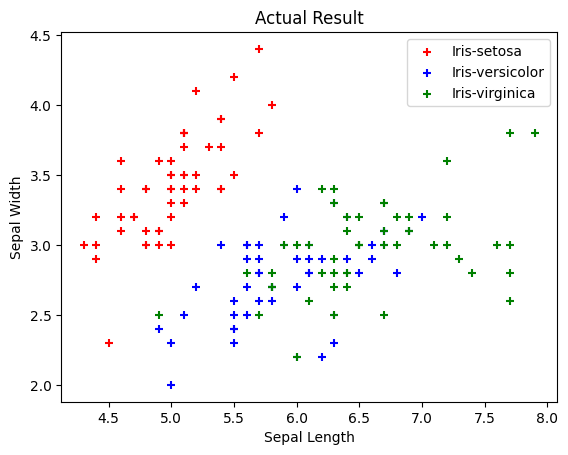

In [57]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = [iris.target_names[i] for i in iris.target]

# Rename columns to match your plotting code
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Prepare data
X = df_iris.drop('species', axis=1)
y = df_iris.species

# Actual Clustering Result
newDf0 = df_iris[df_iris.species == "setosa"]
newDf1 = df_iris[df_iris.species == "versicolor"]
newDf2 = df_iris[df_iris.species == "virginica"]

# Plot
plt.title("Actual Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(newDf0.sepal_length, newDf0.sepal_width, color="red", marker="+", label="Iris-setosa")
plt.scatter(newDf1.sepal_length, newDf1.sepal_width, color="blue", marker="+", label="Iris-versicolor")
plt.scatter(newDf2.sepal_length, newDf2.sepal_width, color="green", marker="+", label="Iris-virginica")
plt.legend()

# displays
plt.show()


#Partition Based: K-means Clustering in Iris Dataset

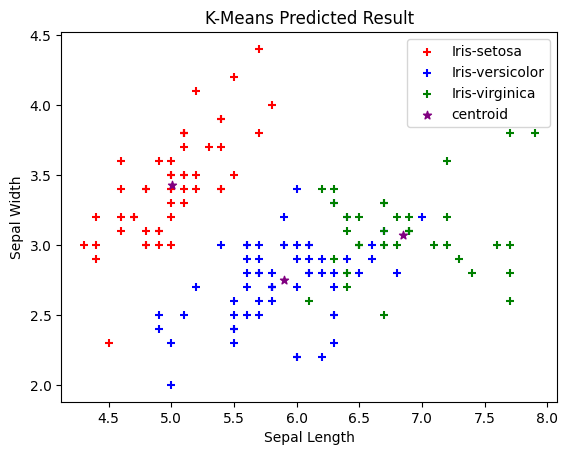

In [58]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=10)
y_predicted = km.fit_predict(X)
newDf = df_iris
newDf["cluster"] = y_predicted
newDf0 = newDf[newDf.cluster==0]
newDf1 = newDf[newDf.cluster==1]
newDf2 = newDf[newDf.cluster==2]
plt.title("K-Means Predicted Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(newDf0.sepal_length, newDf0.sepal_width, color="red",
marker="+", label="Iris-setosa")
plt.scatter(newDf1.sepal_length, newDf1.sepal_width, color="blue",
marker="+", label="Iris-versicolor")
plt.scatter(newDf2.sepal_length, newDf2.sepal_width, color="green",
marker="+", label="Iris-virginica")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")
plt.legend()



In [60]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels
y_true = df_iris['species']

# Predicted cluster labels
y_pred = newDf['cluster']

# Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.8797
Adjusted Rand Index: 0.7302
Mutual Information: 0.8256
Adjusted Mutual Information: 0.7551
Normalized Mutual Information: 0.7582


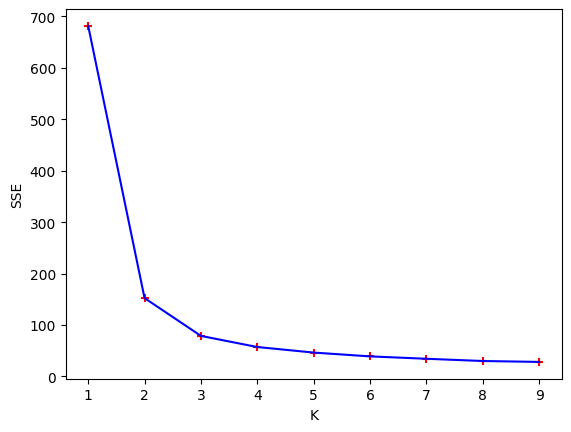

In [61]:
sse = []
k_range = range(1, 10)
for k in k_range:
 km = KMeans(n_clusters=k, n_init=10)
 km.fit_predict(X)
 sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")


In [62]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in
range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion_scores}")
print(f"Separation Score: {separation}")



Silhouette Score:  0.3288445741692321
Calinski Harabasz Score:  407.10892397370236
Davies Bouldin Score:  0.9535208827965123

Cohesion Score: sepal_length    0.053151
sepal_width     0.052161
petal_length    0.054269
petal_width     0.028917
dtype: float64
Separation Score: 0.05650296574770259


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#Partition Based: K-medoids Clustering in Iris Dataset


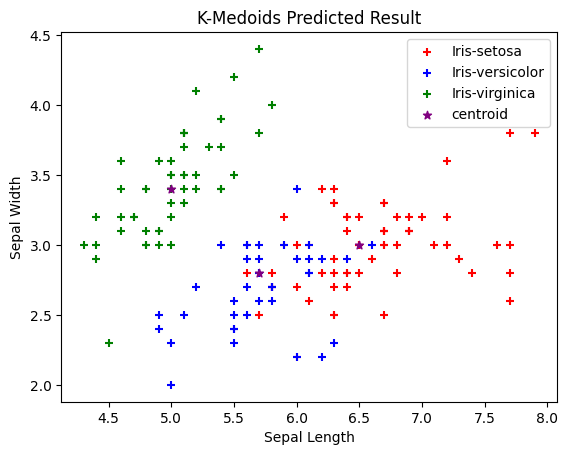

In [63]:
# Clustering using K-medoids algorithm
from sklearn_extra.cluster import KMedoids
km = KMedoids(n_clusters=3)
y_predicted = km.fit_predict(X)
newDf = df_iris
newDf["cluster"] = y_predicted
newDf0 = newDf[newDf.cluster==0]
newDf1 = newDf[newDf.cluster==1]
newDf2 = newDf[newDf.cluster==2]
plt.title("K-Medoids Predicted Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(newDf0.sepal_length, newDf0.sepal_width, color="red",
marker="+", label="Iris-setosa")
plt.scatter(newDf1.sepal_length, newDf1.sepal_width, color="blue",
marker="+", label="Iris-versicolor")
plt.scatter(newDf2.sepal_length, newDf2.sepal_width, color="green",
marker="+", label="Iris-virginica")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
color="purple", marker="*", label="centroid")
plt.legend()


In [64]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels
y_true = df_iris['species']

# Predicted cluster labels
y_pred = newDf['cluster']

# Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.8923
Adjusted Rand Index: 0.7583
Mutual Information: 0.8555
Adjusted Mutual Information: 0.7830
Normalized Mutual Information: 0.7857


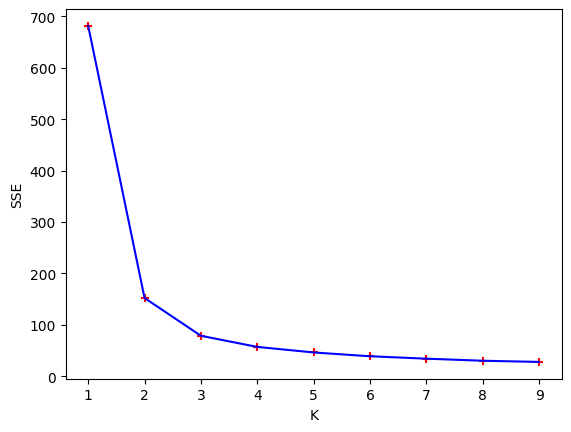

In [65]:
sse = []
k_range = range(1, 10)
for k in k_range:
 km = KMeans(n_clusters=k, n_init=10)
 km.fit_predict(X)
 sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")


In [66]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in
range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion}")
print(f"Separation Score: {separation}")

Silhouette Score:  0.3246578657429647
Calinski Harabasz Score:  410.5963402264386
Davies Bouldin Score:  0.992968470309234

Cohesion Score: 0.04674045755033168
Separation Score: 0.06595964912280704


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#Hierarchical: Dendrogram Clustering in Iris Dataset

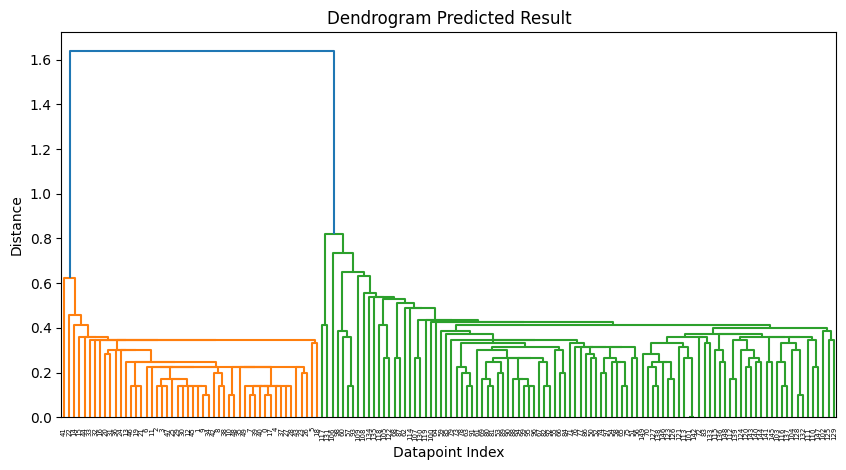

In [67]:
# Clustering using Dendrogram Clustering algorithm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X, method='single')
# Create and plot the dendrogram
plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram Predicted Result')
plt.xlabel('Datapoint Index')
plt.ylabel('Distance')
plt.show()



In [68]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels (numeric)
y_true = df_iris['species']

# Cut the dendrogram to form 3 clusters
y_pred = fcluster(Z, t=3, criterion='maxclust')

# Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.7766
Adjusted Rand Index: 0.5638
Mutual Information: 0.6459
Adjusted Mutual Information: 0.7126
Normalized Mutual Information: 0.7175


In [69]:
labels = fcluster(Z, 3, criterion='maxclust')
silhouette_result = silhouette_score(X, labels)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, labels)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, labels)
print("Davies Bouldin Score: ", davies_result)


Silhouette Score:  0.5121107753649307
Calinski Harabasz Score:  277.99467626461944
Davies Bouldin Score:  0.4471537628542408


#Density Based: DBSCAN Clustering in Iris Dataset


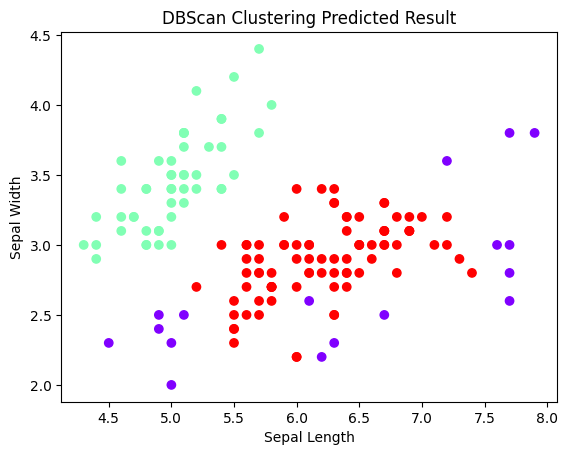

In [70]:
# Clustering using DBSCAN Clustering algorithm
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(X)
plt.scatter(df_iris.sepal_length, df_iris.sepal_width,
c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBScan Clustering Predicted Result')
plt.show()


In [71]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels
y_true = df_iris['species']

# Predicted cluster labels from DBSCAN
y_pred = dbscan.labels_

# If you want to ignore noise points (-1), you can filter them:
# mask = y_pred != -1
# y_true_filtered = y_true[mask]
# y_pred_filtered = y_pred[mask]

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.7719
Adjusted Rand Index: 0.5206
Mutual Information: 0.6152
Adjusted Mutual Information: 0.5990
Normalized Mutual Information: 0.6044


In [72]:
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [73]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, dbscan.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, dbscan.labels_)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, dbscan.labels_)
print("Davies Bouldin Score: ", davies_result)

Silhouette Score:  0.48603419703456857
Calinski Harabasz Score:  220.29751498443005
Davies Bouldin Score:  7.222448016359581


#Density Based: Optics Clustering in Iris Dataset

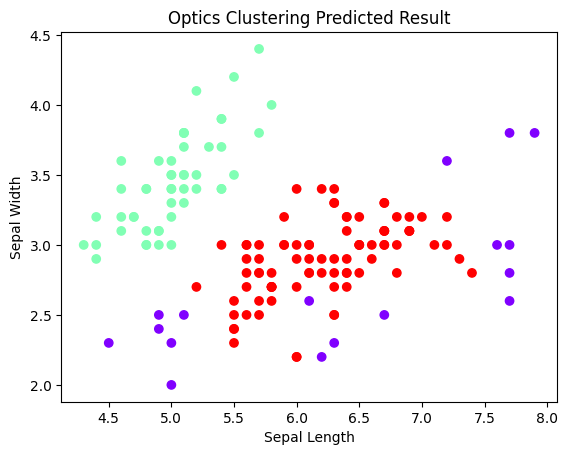

In [74]:
# Clustering using Optics Clustering algorithm
from sklearn.cluster import OPTICS
optics_cluster = OPTICS(min_samples=5, xi=0.05,
cluster_method='dbscan')
optics_cluster.fit(X)
plt.scatter(df_iris.sepal_length, df_iris.sepal_width,
c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Optics Clustering Predicted Result')
plt.show()

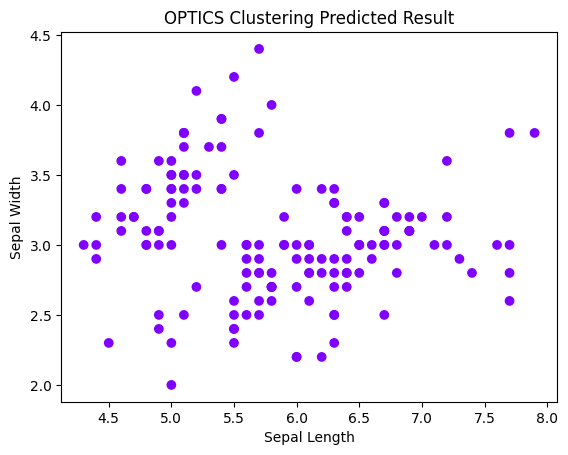

Rand Index: 0.3289
Adjusted Rand Index: 0.0000
Mutual Information: 0.0000
Adjusted Mutual Information: 0.0000
Normalized Mutual Information: 0.0000


In [75]:
from sklearn.cluster import OPTICS
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score
import matplotlib.pyplot as plt

# Run OPTICS
optics_cluster = OPTICS(min_samples=5, xi=0.05, cluster_method='dbscan')
y_pred = optics_cluster.fit_predict(X)  # predicted cluster labels

# Plot clusters
plt.scatter(df_iris.sepal_length, df_iris.sepal_width, c=y_pred, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('OPTICS Clustering Predicted Result')
plt.show()

# True labels
y_true = df_iris['species']

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")

#K-means++ Clustering in Iris Dataset

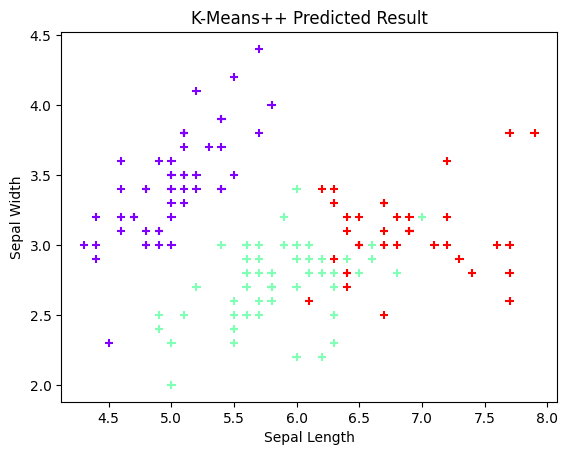

In [76]:
# Clustering using K-means++ algorithm
from sklearn.cluster import KMeans
km = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300,
random_state=42)
km = KMeans(n_clusters=3, n_init=10)
y_predicted = km.fit_predict(X)
plt.title("K-Means++ Predicted Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df_iris.sepal_length, df_iris.sepal_width, c=km.labels_,
cmap='rainbow', marker="+")
plt.show()

In [77]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels
y_true = df_iris['species']

# Predicted cluster labels from K-Means++
y_pred = km.labels_  # or y_predicted

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.8797
Adjusted Rand Index: 0.7302
Mutual Information: 0.8256
Adjusted Mutual Information: 0.7551
Normalized Mutual Information: 0.7582


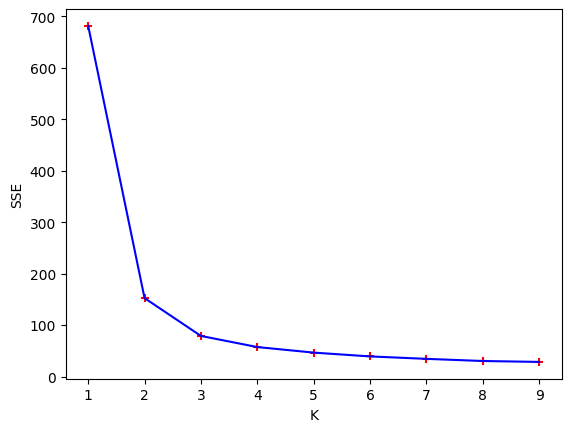

In [78]:
# Visualisation of SSE (Sum of Squared Errors) & Elbow Graph:
sse = []
k_range = range(1, 10)
for k in k_range:
 km = KMeans(n_clusters=k, n_init=10)
 km.fit_predict(X)
 sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")
# We can see here, our elbow is at K=3

In [79]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in
range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion}")
print(f"Separation Score: {separation}")


Silhouette Score:  0.35871429635150665
Calinski Harabasz Score:  406.0398595222956
Davies Bouldin Score:  0.9555973859633817

Cohesion Score: 0.04724314732538415
Separation Score: 0.08432474747474747


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#Bisecting K-means Clustering in Iris Dataset

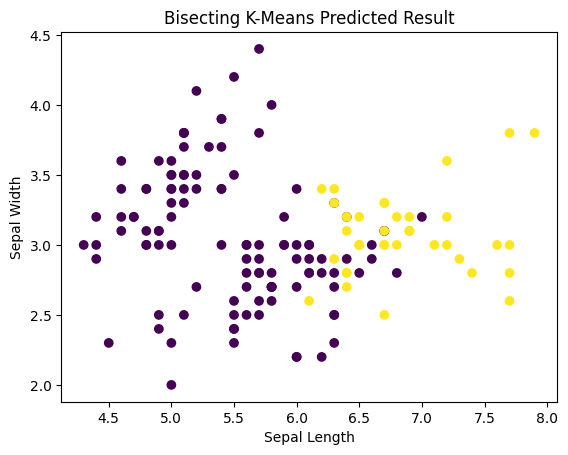

In [80]:
# Clustering using Bisecting K-means algorithm
from sklearn.cluster import KMeans
km = KMeans(n_clusters=1, n_init=10, random_state=0).fit(X)
K=3
for i in range(K-1):
 largest_cluster = np.argmax(np.bincount(km.labels_))
 largest_cluster_mask = (km.labels_ == largest_cluster)
 X_split = X[largest_cluster_mask]
 km.labels_[largest_cluster_mask] = KMeans(n_clusters=2, n_init=10,
random_state=0).fit(X_split).labels_
plt.title("Bisecting K-Means Predicted Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df_iris.sepal_length, df_iris.sepal_width, c=km.labels_,
cmap='viridis')
plt.show()

In [81]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels
y_true = df_iris['species']

# Predicted cluster labels from Bisecting K-Means
y_pred = km.labels_

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.6023
Adjusted Rand Index: 0.2646
Mutual Information: 0.3123
Adjusted Mutual Information: 0.3701
Normalized Mutual Information: 0.3753


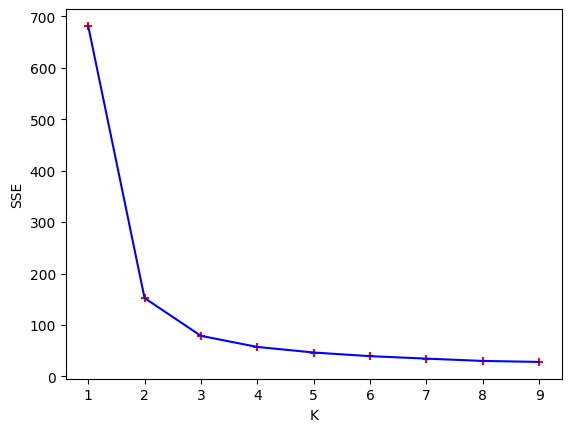

In [82]:
# Visualisation of SSE (Sum of Squared Errors) & Elbow Graph:
sse = []
k_range = range(1, 10)
for k in k_range:
 km = KMeans(n_clusters=k, n_init=10)
 km.fit_predict(X)
 sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")
# We can see here, our elbow is at K=3


In [83]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in
range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion}")
print(f"Separation Score: {separation}")


Silhouette Score:  0.3264323541971361
Calinski Harabasz Score:  409.20943915625554
Davies Bouldin Score:  0.9749232977941986

Cohesion Score: 0.04689232999700105
Separation Score: 0.060485458089668626


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#WINE DATASET


In [84]:
pip install ucimlrepo

In [85]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)
df = X.copy()
df['class'] = y  # add target column
print(df.head())



{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

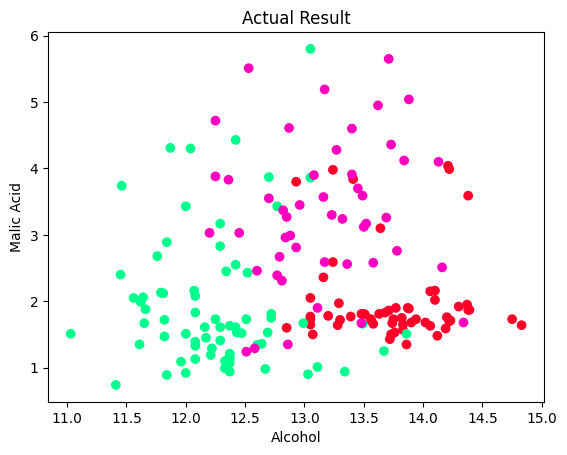

In [86]:
plt.title("Actual Result")
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.scatter(df.Alcohol, df.Malicacid, c=df["class"],
cmap='gist_rainbow')


#Partition Based: K-means Clustering in Wine Dataset

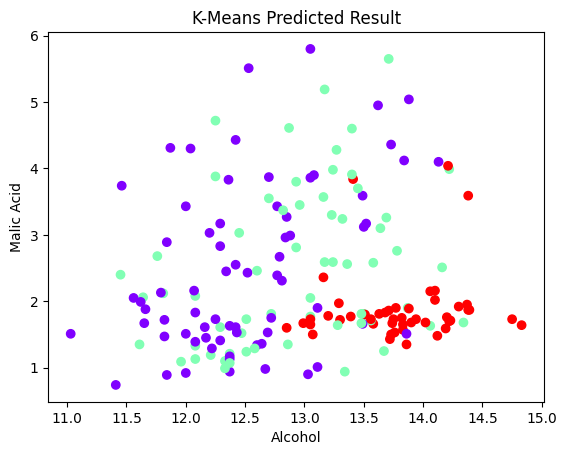

In [87]:
# Clustering using K-means algorithm
from sklearn.cluster import KMeans
km = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300,
random_state=42)
y_predicted = km.fit_predict(X)
plt.title("K-Means Predicted Result")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.scatter(df.Alcohol, df.Malicacid, c=km.labels_, cmap='rainbow')
plt.show()

In [88]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels (numeric for Wine dataset)
y_true = df['class']

# Predicted cluster labels from K-Means
y_pred = km.labels_  # or y_predicted

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.7187
Adjusted Rand Index: 0.3711
Mutual Information: 0.4657
Adjusted Mutual Information: 0.4227
Normalized Mutual Information: 0.4288


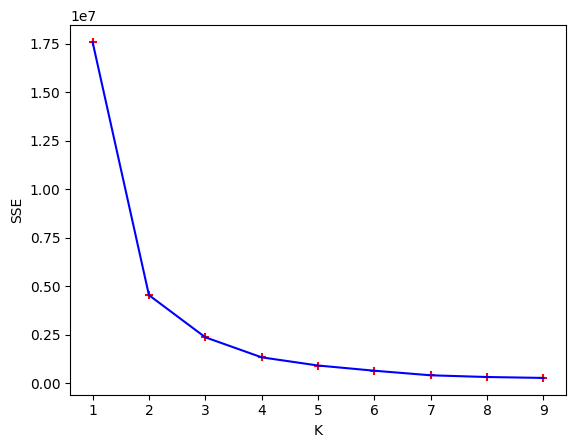

In [89]:
# Visualisation of SSE (Sum of Squared Errors) & Elbow Graph:
sse = []
k_range = range(1, 10)
for k in k_range:
 km = KMeans(n_clusters=k, n_init=10)
 km.fit_predict(X)
 sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")
# We can see here, our elbow is at K=3


In [91]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in
range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion}")
print(f"Separation Score: {separation}")


Silhouette Score:  0.5431736964173127
Calinski Harabasz Score:  1322.5249160228334
Davies Bouldin Score:  0.5229108899193478

Cohesion Score: 119.52803139318482
Separation Score: 452.7905608949301


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#Partition Based: K-medoids Clustering in Wine Dataset

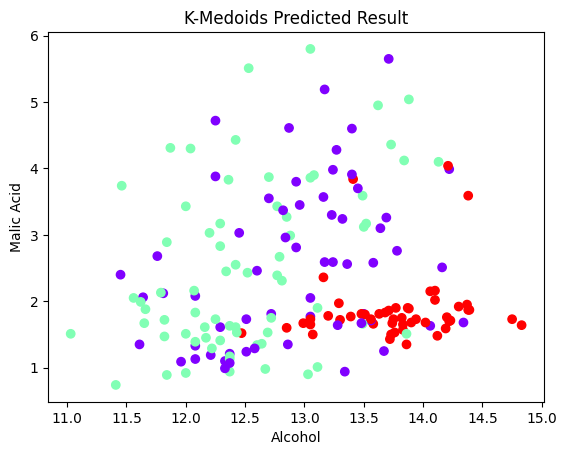

In [92]:
# Clustering using K-medoids algorithm
from sklearn_extra.cluster import KMedoids
km = KMedoids(n_clusters=3)
y_predicted = km.fit_predict(X)
plt.title("K-Medoids Predicted Result")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.scatter(df.Alcohol, df.Malicacid, c=km.labels_, cmap='rainbow')
plt.show()

In [94]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels (numeric)
y_true = df['class']

# Predicted cluster labels from K-Medoids
y_pred = km.labels_  # or y_predicted

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.7295
Adjusted Rand Index: 0.3941
Mutual Information: 0.4737
Adjusted Mutual Information: 0.4292
Normalized Mutual Information: 0.4352


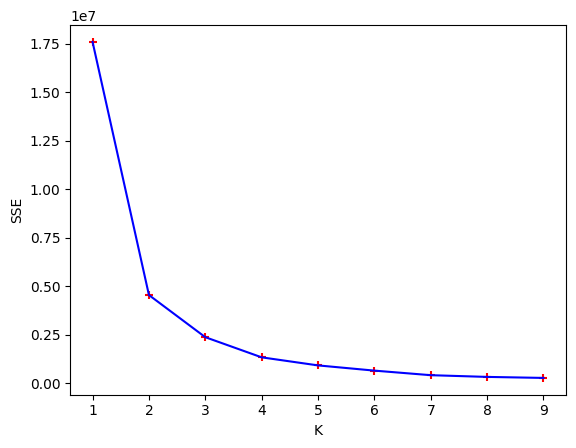

In [95]:
# Visualisation of SSE (Sum of Squared Errors) & Elbow Graph:
sse = []
k_range = range(1, 10)
for k in k_range:
 km = KMeans(n_clusters=k, n_init=10)
 km.fit_predict(X)
 sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")
# We can see here, our elbow is at K=3


In [96]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in
range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion}")
print(f"Separation Score: {separation}")


Silhouette Score:  0.5316577207122226
Calinski Harabasz Score:  1350.2082067758506
Davies Bouldin Score:  0.5143723568247524

Cohesion Score: 117.11510269734075
Separation Score: 529.8940000361451


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#Hierarchical: Dendrogram Clustering in Wine Dataset


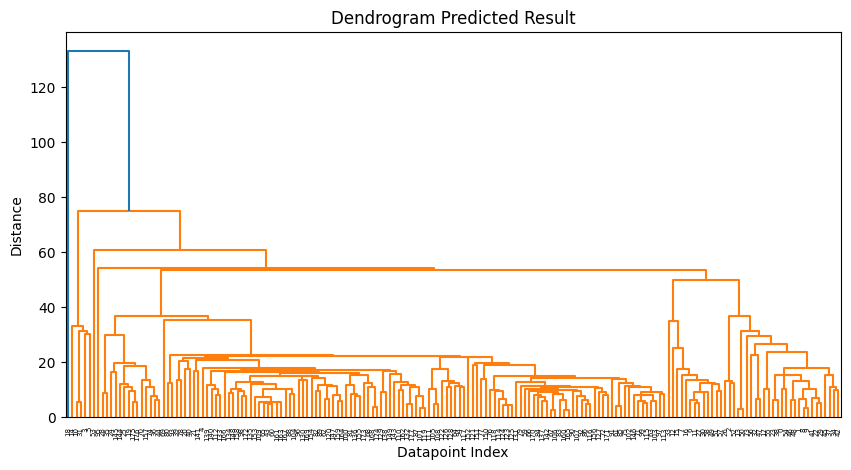

In [97]:
# Clustering using Dendrogram Clustering algorithm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X, method='single')
# Create and plot the dendrogram
plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram Predicted Result')
plt.xlabel('Datapoint Index')
plt.ylabel('Distance')
plt.show()


In [98]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# Cut dendrogram to form 3 clusters
y_pred = fcluster(Z, t=3, criterion='maxclust')

# True labels (numeric)
y_true = df['class']

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.3628
Adjusted Rand Index: 0.0054
Mutual Information: 0.0384
Adjusted Mutual Information: 0.0416
Normalized Mutual Information: 0.0615


In [99]:
# Evaluating Metrics
labels = fcluster(Z, 3, criterion='maxclust')
from sklearn.metrics import silhouette_score
silhouette_result = silhouette_score(X, labels)
print("Silhouette Score: ", silhouette_result)
from sklearn.metrics import calinski_harabasz_score
calinski_result = calinski_harabasz_score(X, labels)
print("Calinski Harabasz Score: ", calinski_result)
from sklearn.metrics import davies_bouldin_score
davies_result = davies_bouldin_score(X, labels)
print("Davies Bouldin Score: ", davies_result)


Silhouette Score:  0.4879820335189063
Calinski Harabasz Score:  24.42036238154286
Davies Bouldin Score:  0.30814096183494405


#Density Based: DBSCAN Clustering in Wine Dataset


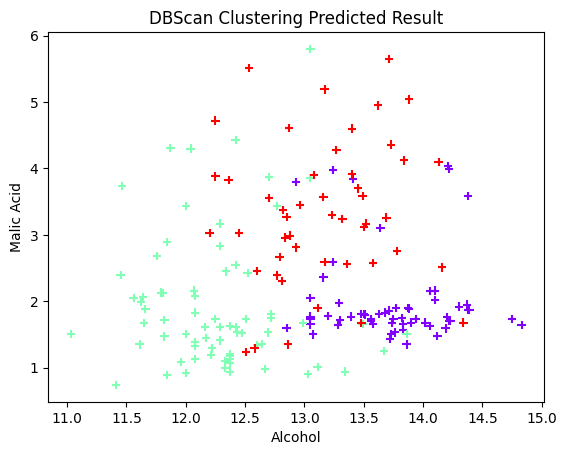

In [100]:
# Clustering using DBSCAN Clustering algorithm
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(X)
plt.title('DBScan Clustering Predicted Result')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.scatter(df.Alcohol, df.Malicacid, c=df["class"], cmap='rainbow',
marker="+")
plt.show()


#Density Based: Optics Clustering in Wine Dataset

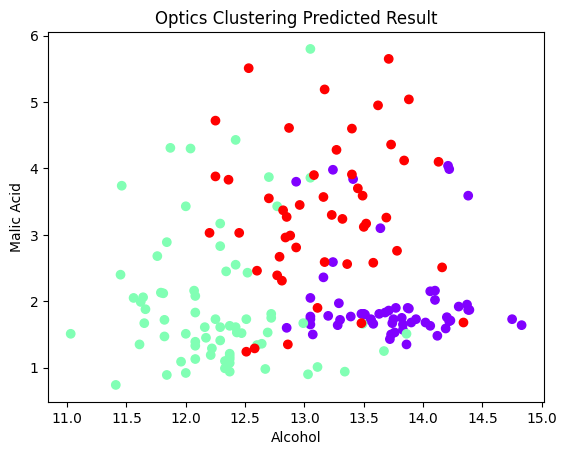

In [101]:
# Clustering using Optics Clustering algorithm
from sklearn.cluster import OPTICS
optics_cluster = OPTICS(min_samples=5, xi=0.05,
cluster_method='dbscan')
optics_cluster.fit(X)
plt.scatter(df.Alcohol, df.Malicacid, c=df["class"], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Optics Clustering Predicted Result')
plt.show()


#K-means++ Clustering in Wine Dataset

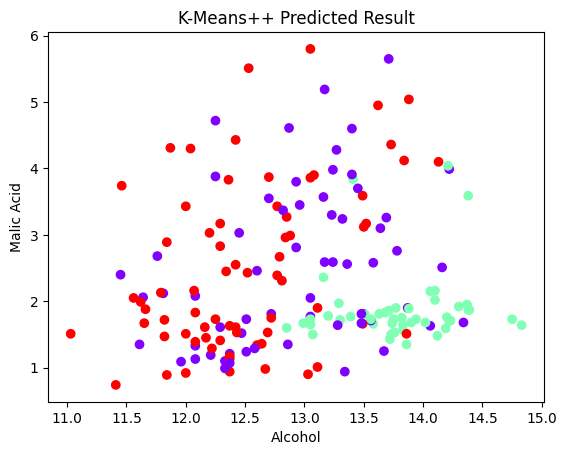

In [102]:
# Clustering using K-means++ algorithm
from sklearn.cluster import KMeans
km = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300,
random_state=42)
km = KMeans(n_clusters=3, n_init=10)
y_predicted = km.fit_predict(X)
plt.title("K-Means++ Predicted Result")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.scatter(df.Alcohol, df.Malicacid, c=km.labels_, cmap='rainbow')
plt.show()

In [103]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels
y_true = df['class']

# Predicted cluster labels from K-Means++
y_pred = km.labels_  # or y_predicted

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.7187
Adjusted Rand Index: 0.3711
Mutual Information: 0.4657
Adjusted Mutual Information: 0.4227
Normalized Mutual Information: 0.4288


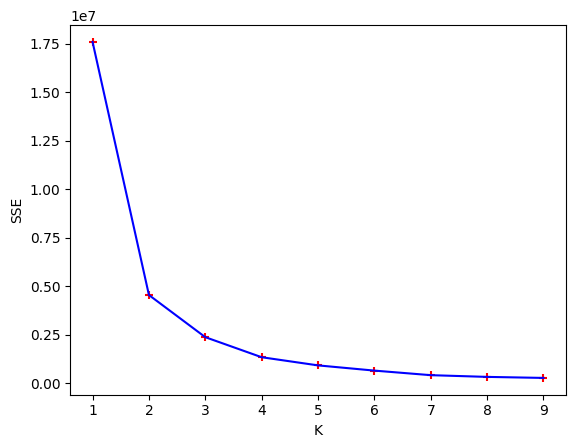

In [104]:
sse = []
k_range = range(1, 10)
for k in k_range:
 km = KMeans(n_clusters=k, n_init=10)
 km.fit_predict(X)
 sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")
# We can see here, our elbow is at K=3

In [105]:
# Evaluating Metrics
from sklearn.metrics import silhouette_score
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
from sklearn.metrics import calinski_harabasz_score
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski Harabasz Score: ", calinski_result)
from sklearn.metrics import davies_bouldin_score
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in
range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion}")
print(f"Separation Score: {separation}")

Silhouette Score:  0.527941546551372
Calinski Harabasz Score:  1354.516032526728
Davies Bouldin Score:  0.5307163453404704

Cohesion Score: 116.74835625456451
Separation Score: 490.3288387397935


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#Bisecting K-means Clustering in Wine Dataset


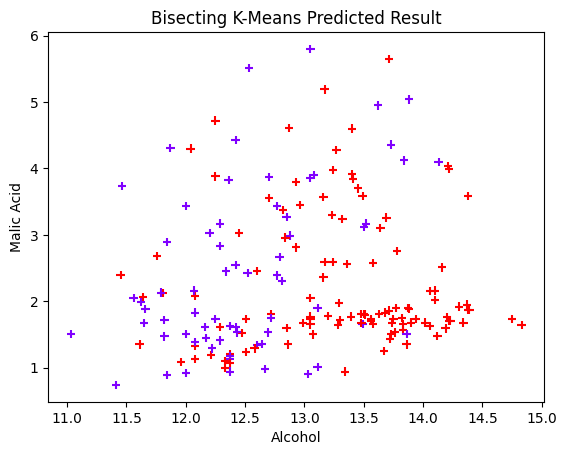

In [106]:
# Clustering using Bisecting K-means algorithm
from sklearn.cluster import KMeans
km = KMeans(n_clusters=1, n_init=10, random_state=0).fit(X)
K=3
for i in range(K-1):
 largest_cluster = np.argmax(np.bincount(km.labels_))
 largest_cluster_mask = (km.labels_ == largest_cluster)
 X_split = X[largest_cluster_mask]
 km.labels_[largest_cluster_mask] = KMeans(n_clusters=2, n_init=10,
random_state=0).fit(X_split).labels_
plt.title("Bisecting K-Means Predicted Result")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.scatter(df.Alcohol, df.Malicacid, c=km.labels_, cmap='rainbow',
marker="+")
plt.show()

In [107]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# True labels
y_true = df['class']

# Predicted cluster labels from Bisecting K-Means
y_pred = km.labels_

# Compute Rand Index
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Compute Mutual Information scores
mi = mutual_info_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# Print results
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Mutual Information: {mi:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Rand Index: 0.6034
Adjusted Rand Index: 0.2224
Mutual Information: 0.2372
Adjusted Mutual Information: 0.2670
Normalized Mutual Information: 0.2718


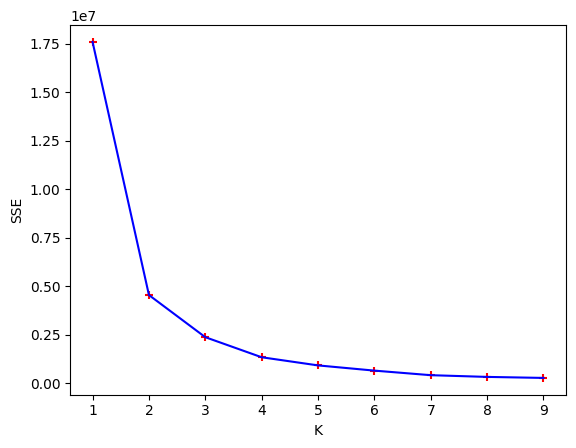

In [108]:
# Visualisation of SSE (Sum of Squared Errors) & Elbow Graph:
sse = []
k_range = range(1, 10)
for k in k_range:
 km = KMeans(n_clusters=k, n_init=10)
 km.fit_predict(X)
 sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")
# We can see here, our elbow is at K=3

In [109]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in
range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion}")
print(f"Separation Score: {separation}")


Silhouette Score:  0.5307235924738344
Calinski Harabasz Score:  1350.4583188269025
Davies Bouldin Score:  0.5163732495928285

Cohesion Score: 117.09374643108792
Separation Score: 702.9750251711223


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
